In [1]:
import pandas as pd

## What are the Default Strategies?
- Make sure there is a strategy that makes sense for in and out of position
- The default strategy will be used by the first opponent bot

Strategies are found in the 9max/postflop ranges folder

## What are the Ranges and Positions for Each Range?

- Do not analyze any 4Bets or cold 4Bets (raise for RFI vs 3Bet and all Cold4B ranges)

In [2]:
# RFI
lj_rfi = "55+,A2s+,K9s+,Q9s+,J9s+,T9s,98s,87s,76s,AJo+,KQo+"
hj_rfi = "22+,A2s+,K9s+,Q9s+,J9s+,T9s,98s,87s,76s,65s,ATo+,KJo+,QJo"
co_rfi = "22+,A2s+,K6s+,Q8s+,J8s+,T8s+,97s+,86s+,75s+,65s,54s,ATo+,KTo+,QTo+,JTo"
bn_rfi = "22+,A2s+,K4s+,Q6s+,J7s+,T7s+,96s+,85s+,75s+,64s+,53s+,43s,A4o+,K9o+,Q9o+,J9o+,T9o"
sb_rfi = "22+,A2s+,K3s+,Q5s+,J6s+,T6s+,96s+,85s+,75s+,64s+,53s+,43s,A2o+,K8o+,Q9o+,J9o+,T9o,98o"

# vs RFI
vsRFI_bb_vs_lj__raise = "TT+,AQs+,AKo"
vsRFI_bb_vs_lj__call = "99-22,AJs-A2s,K6s+,Q8s+,J8s+,T8s+,97s+,86s+,76s,65s,54s,AQo-ATo,KTo+,QTo+,JTo"
vsRFI_bb_vs_hj__raise = "TT+,ATs+,AKo"
vsRFI_bb_vs_hj__call = "99-22,A9s-A2s,K5s+,Q7s+,J7s+,T7s+,96s+,86s+,75s+,65s,54s,43s,AQo-ATo,KTo+,QTo+,JTo"
vsRFI_bb_vs_co__raise = "99+,A8s+,KJs+,QJs,JTs,T9s,98s,AQo+,KQo"
vsRFI_bb_vs_co__call = "88-22,A7s-A2s,KTs-K2s,QTs-Q5s,J9s-J6s,T8s-T6s,97s-96s,85s+,74s+,64s+,53s+,43s,AJo-A7o,A5o,KJo-K9o,Q9o+,J9o+,T9o"
vsRFI_bb_vs_bn__raise = "88+,A6s+,KTs+,QTs+,JTs,T9s,98s,87s,76s,AJo+,KQo"
vsRFI_bb_vs_bn__call = "77-22,A5s-A2s,K9s-K2s,Q9s-Q2s,J9s-J5s,T8s-T5s,97s-95s,86s-84s,75s-74s,63s+,53s+,42s+,32s,ATo-A2o,KJo-K7o,Q8o+,J8o+,T8o+,98o,87o"
vsRFI_bb_vs_sb__raise = "44+,A8s+,A5s-A3s,K9s+,Q9s+,J9s,T8s+,97s+,86s+,75s+,64s+,54s,AJo+,KQo"
vsRFI_bb_vs_sb__call = "33-22,A7s-A6s,A2s,K8s-K2s,Q8s-Q2s,J8s-J4s,T7s-T4s,96s-94s,85s-84s,74s-73s,63s-62s,53s-52s,42s+,32s,ATo-A2o,KJo-K5o,Q7o+,J7o+,T7o+,97o+,87o,76o,65o"

# vs RFI
vsRFI_hj_vs_lj__raise = "JJ+,AJs+,KQs,AKo"
vsRFI_hj_vs_lj__call = "TT-77,ATs,KJs,QJs,JTs,AQo"
vsRFI_co_vs_lj__raise = "JJ+,AJs+,KQs,AKo"
vsRFI_co_vs_lj__call = "TT-66,ATs,KJs,QJs,JTs,AQo"
vsRFI_co_vs_hj__raise = "JJ+,AJs+,A5s-A4s,KQs,T9s,AQo+"
vsRFI_co_vs_hj__call = "TT-55,ATs,KJs,QJs,JTs"
vsRFI_bn_vs_lj__raise = "JJ+,AKs,A5s-A2s,AKo"
vsRFI_bn_vs_lj__call = "TT-55,AQs-ATs,KTs+,QTs+,JTs,T9s,98s,87s,AQo"
vsRFI_bn_vs_hj__raise = "JJ+,AJs+,A8s,A5s-A2s,KQs,76s,65s,54s,AKo"
vsRFI_bn_vs_hj__call = "TT-33,ATs-A9s,KJs-KTs,QTs+,JTs,T9s,98s,87s,AQo-AJo,KQo"
vsRFI_bn_vs_co__raise = "TT+,ATs+,A7s-A2s,KJs+,QJs,JTs,T9s,76s,65s,54s,AJo+,KQo"
vsRFI_bn_vs_co__call = "99-22,A9s-A8s,KTs,QTs,98s,87s"
vsRFI_sb_vs_lj__raise = "JJ+,ATs+,KQs,AKo"
vsRFI_sb_vs_lj__call = "TT-77,QJs,JTs,AQo"
vsRFI_sb_vs_hj__raise = "JJ+,ATs+,KJs+,QJs,JTs,AQo+"
vsRFI_sb_vs_hj__call = "TT-66,T9s"
vsRFI_sb_vs_co__raise = "JJ+,A9s+,A5s-A4s,KJs+,QJs,JTs,T9s,98s,AJo+,KQo"
vsRFI_sb_vs_co__call = "TT-55,KTs,QTs"
vsRFI_sb_vs_bn__raise = "55+,A2s+,K9s+,Q9s+,J9s+,T8s+,98s,87s,76s,ATo+,KQo+"
vsRFI_sb_vs_bn__call = ""

RFIvs3B_lj_vs_hjco_call = "JJ-77,AQs-AJs,KQs,QJs,JTs"
RFIvs3B_lj_vs_bn_call = "JJ-77,AQs-AJs,KJs+,QJs,JTs,T9s"
RFIvs3B_lj_vs_blinds_call = "JJ-66,AQs-ATs,KJs+,QJs,JTs,T9s"
RFIvs3B_hj_vs_ahead_call = "TT-66,AQs-ATs,KTs+,QTs+,JTs,T9s,AQo"
RFIvs3B_co_vs_bn_call = "TT-66,AQs-A8s,KTs+,QTs+,JTs,T9s,98s,AQo"
RFIvs3B_co_vs_blinds_call = "TT-55,AQs-A8s,KTs+,QTs+,JTs,T9s,98s,87s,AQo"
RFIvs3B_bnsb_vs_ahead_call = "TT-33,AQs-A6s,K9s+,Q9s+,J9s+,T8s+,97s+,87s,76s,65s,54s,ATo+,KJo+,QJo"


## Script to Read Ranges and Output Combos Collection

In [8]:
# Input: range
def range_to_hands(c_range="JJ+,AJs+,KQs,AKo"):
    m = {
        "A": 14, "K": 13, "Q": 12, "J": 11, "T": 10, "9": 9,
        "8": 8, "7": 7, "6": 6, "5": 5, "4": 4, "3": 3, "2": 2
    }
    temp = c_range.split(",")

    pps = []
    pp = temp[0]
    if "+" in pp:
        for i in range(14,m[pp[0]]-1,-1):
            pps.append([i, i])
    elif "-" in pp:
        for i in range(m[pp[0]],m[pp[-1]]-1,-1):
            pps.append([i, i])
    else:
        pps.append([m[pp[0]], m[pp[0]]])

    ss = []
    temp_s = [x for x in temp if "s" in x]
    for s in temp_s:
        if "+" in s:
            for i in range(m[s[0]]-1,m[s[1]]-1,-1):
                ss.append([m[s[0]], i])
        elif "-" in s:
            for i in range(m[s[1]],m[s[5]]-1,-1):
                ss.append([m[s[0]], i])
        else:
            ss.append([m[s[0]], m[s[1]]])

    os = []
    temp_o = [x for x in temp if "o" in x]
    for o in temp_o:
        if "+" in o:
            for i in range(m[o[0]]-1,m[o[1]]-1,-1):
                os.append([m[o[0]], i])
        elif "-" in o:
            for i in range(m[o[1]],m[o[5]]-1,-1):
                os.append([m[o[0]], i])
        else:
            os.append([m[o[0]], m[o[1]]])
    # Output: [[2,2]], [[14,13]], [[14,13]]
        # PP, Suited, Offsuit
    return pps, ss, os


In [16]:
range_to_hands()

([[14, 14], [13, 13], [12, 12], [11, 11]],
 [[14, 13], [14, 12], [14, 11], [13, 12]],
 [[14, 13]])

## What Hands & Range Fall Under Which Category Given a Definition

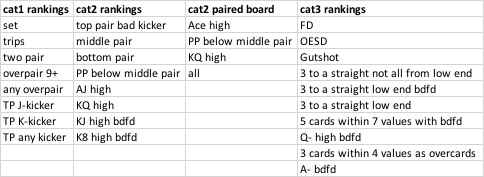

- cat1 will use simple logic to determine best rule based on flop alone
- cat2 rule will be optimized for
- cat3 rule will be optimized for

In [17]:
# Input
flop = [7,4,3]
hand = [14,14]
range_name = "CO RFI vs BN call"
cat1_rule = "any overpair"
cat2_rule = "K8 high bdfd"
cat3_rule = "3 cards within 4 values as overcards"
first_cat4_pp = "22"

# Output Initialized
cat1_hands = [[], [], []]
cat2_hands = [[], [], []]
cat3_hands = [[], [], []]
cat4_hands = [[], [], []]
cat1_range = ""
cat2_range = ""
cat3_range = ""
cat4_range = ""


In [19]:
co_rfi

'22+,A2s+,K6s+,Q8s+,J8s+,T8s+,97s+,86s+,75s+,65s,54s,ATo+,KTo+,QTo+,JTo'

In [21]:
my_hands = range_to_hands(co_rfi)
opponents_hands = range_to_hands(vsRFI_bn_vs_co__call)

In [22]:
opponent_range

([[9, 9], [8, 8], [7, 7], [6, 6], [5, 5], [4, 4], [3, 3], [2, 2]],
 [[14, 9], [14, 8], [13, 10], [12, 10], [9, 8], [8, 7]],
 [])